# Feature-engine

In [1]:
 pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer

In [4]:
X = pd.DataFrame(dict(
       x1 = [np.nan,1,1,0,np.nan],
       x2 = ["a", np.nan, "b", np.nan, "a"],
       ))
mmi = MeanMedianImputer(imputation_method='median')
mmi.fit(X)
mmi.transform(X)

,x1,x2
0,1.0,a
1,1.0,NaN
2,1.0,b
3,0.0,NaN
4,1.0,a


In [5]:
#linear regression Feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [6]:
#define dataset
X,y = make_regression(n_samples = 1000, n_features = 10, n_informative  = 5, random_state=1)
print(X)
print(y)

[[-2.02220122  0.31563495  0.82797464 ... -0.50446586  0.23009474
   0.76201118]
 [ 0.71256194  1.74103872 -1.21466535 ...  1.04131149 -0.75850596
   0.74791592]
 [ 0.08338884  0.92829021  1.45167891 ...  1.22393601  0.3416886
  -0.12517266]
 ...
 [ 0.12182436  0.74220833 -0.64488697 ... -2.37934499  1.82039313
  -1.55531804]
 [ 0.00820639 -0.89191578  0.14747174 ... -1.78611048  0.71238157
  -1.07498942]
 [-0.43805451  0.29078795  0.17794556 ... -0.18581086 -0.26120192
   0.8632634 ]]
[-8.42877859e+01 -9.94927008e+01  1.05787034e+01  5.37899294e+01
 -3.70135471e+00  3.75987136e+01 -1.35735590e+02  9.35036987e+01
 -1.03941968e+02  1.41989579e+01  1.12479751e+02  3.00996991e+02
  1.09526570e+01 -1.07835903e+02  3.77182129e+01  1.54366306e+02
 -4.96393292e+01  6.23171752e+01 -2.55567671e+02  4.13245345e+01
 -1.23446014e+01 -6.10173687e+01  1.70252877e+02  1.14872670e+01
 -3.20300581e+01 -7.01207608e+01  2.38563440e+01 -1.35524167e+02
 -9.41054198e+01 -5.91991022e+01 -1.28756571e+02 -2.74

In [7]:
# define the model
model = LinearRegression()

In [8]:
#fit the model
model.fit(X,y)

LinearRegression()

In [9]:
#get importance
importance  = model.coef_

In [10]:
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


<BarContainer object of 10 artists>

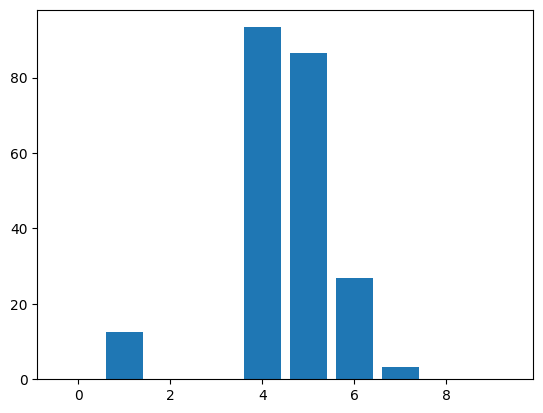

In [11]:
#plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)